In [16]:
import numpy as np
import pandas as pd

class PCA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.components_ = None
        self.mean = None
        self.eigenvalues_ = None

    def fit(self, X):
        # Center the data along the features axis(which will be new coordinate)
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        
        # Calculate the covariance matrix
        covariance_matrix = np.cov(X_centered, rowvar=False)
        
        # Eigen decomposition of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
        ''' https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html '''
        
        
        # Sort eigenvalues and eigenvectors in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        self.eigenvalues_ = eigenvalues[sorted_indices]
        self.components_ = eigenvectors[:, sorted_indices]

        # print("Eigenvalues:", eigenvalues)
        # print( eigenvectors)
        
        # Select a subset of the components if n_components is specified
        if self.n_components is not None:
            self.components_ = self.components_[:, :self.n_components]
            self.eigenvalues_ = self.eigenvalues_[:self.n_components]
            
        # normalize the components if the components are negative make it positive
        # self.components_ = self.components_ / np.linalg.norm(self.components_, axis=0)
        

    def transform(self, X, tol=1e-4):
        # Standardize the data using the mean from the fit
        X_centered = X - self.mean
        
        # Project the data onto the principal components
        X_transformed = np.dot(X_centered, self.components_)
        
        return X_transformed

    def fit_transform(self, X):
        self.fit(X)
        X_transformed = self.transform(X)
        
        # Flip signs of components if necessary (for consistent orientation)
        for i in range(self.components_.shape[1]):
            if np.sum(X_transformed[:, i]) < 0:  # Check if the component is flipped
                X_transformed[:, i] *= -1
        
        return X_transformed
    
    def inverse_transform(self, X_transformed):
        return np.dot(X_transformed, self.components_.T) + self.mean
    
    def CheckPCA(self,X,tol=0.5):
        # Check with the reduced dataset
        X_reduced = self.transform(X)
        X_recovered = self.inverse_transform(X_reduced)
        
        # check dimension
        reduction = X_reduced.shape[1] == self.n_components
        
        # check if the recovered data is close to the original data
        reconstruction_error = np.linalg.norm(X - X_recovered) / np.linalg.norm(X)
        correct_reconstruction = reconstruction_error < tol
        
        print("Reconstruction Error:", reconstruction_error)
        print(reduction, correct_reconstruction)
        return reduction and correct_reconstruction
    
    def explained_variance_ratio(self):
        return self.eigenvalues_ / np.sum(self.eigenvalues_)
    

# Example usage:
if __name__ == "__main__":
    # Sample data
    np.random.seed(42)
    X_sample = np.random.rand(100, 5)  # 100 samples with 5 features

    # Create PCA instance with 2 components
    pca = PCA(n_components=2)

    # Fit and transform the sample data
    X_pca = pca.fit_transform(X_sample)

    print("Transformed Data Shape:", X_pca.shape)
    print("Principal Components:\n", pca.components_)
    print("Explained Variance:\n", pca.eigenvalues_)

Transformed Data Shape: (100, 2)
Principal Components:
 [[-0.41852924  0.54131213]
 [ 0.46099129 -0.13865383]
 [ 0.48468197 -0.31487587]
 [-0.44426648 -0.34094634]
 [-0.4243006  -0.6872882 ]]
Explained Variance:
 [0.12878387 0.10547616]


In [17]:
# ramdom matrix
X = [[1, 3], [7, 5]]

cov = np.cov(X, rowvar=False)

print(cov)

[[18.  6.]
 [ 6.  2.]]



Transformed Data Shape: (100, 2)
Principal Components:
 [[0.6778734 ]
 [0.73517866]]
Explained Variance:
 [1.28402771]
Reconstruction Error: 0.07374008127852777
True True
True


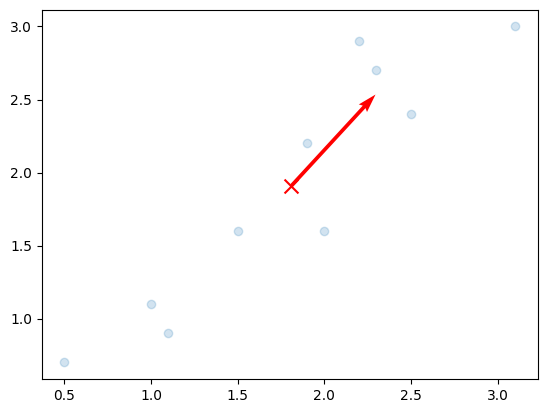

In [18]:
X = np.array([[2.5, 2.4],
              [0.5, 0.7],
              [2.2, 2.9],
              [1.9, 2.2],
              [3.1, 3.0],
              [2.3, 2.7],
              [2.0, 1.6],
              [1.0, 1.1],
              [1.5, 1.6],
              [1.1, 0.9]])

# Create a PCA instance, set the number of components
pca = PCA(n_components=1)

# Check if PCA reduces dimensions correctly
# result = pca.checkPCA(X)
# print("PCA works:", result)

pca.fit_transform(X)
print()

print("Transformed Data Shape:", X_pca.shape)
print("Principal Components:\n", pca.components_)
print("Explained Variance:\n", pca.eigenvalues_)
print(pca.CheckPCA(X, tol=0.5))

# Plot this data with pca
import matplotlib.pyplot as plt

X_pca = pca.transform(X)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
# plot the mean
plt.scatter(np.mean(X,axis=0)[0], np.mean(X,axis=0)[1], color='red', s=100, marker='x')
# plot the eigen vector
plt.quiver(*np.mean(X,axis=0), pca.components_[0,0], pca.components_[1,0], color=['r'], scale=4)
plt.show()

In [19]:
import numpy as np

# Create a matrix
A = np.array([[1, 2],
              [3, 4]])

# Calculate eigenvalues and eigenvectors
w, v = np.linalg.eigh(A)

print("Eigenvalues:", w)
print("Eigenvectors:")
print(v)

Eigenvalues: [-0.85410197  5.85410197]
Eigenvectors:
[[-0.85065081  0.52573111]
 [ 0.52573111  0.85065081]]


(200, 512)
Reconstruction Error: 0.4183340152472464
True True
True


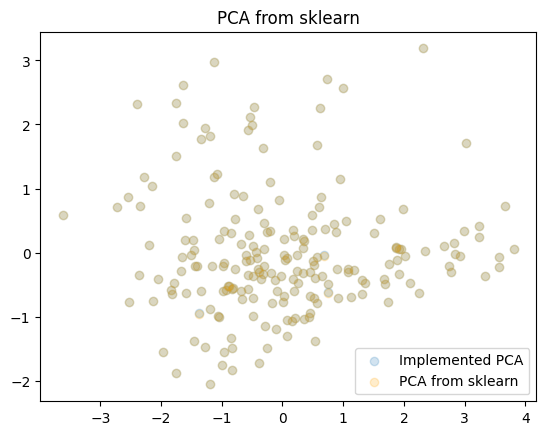

In [20]:
# Load the data
filepath = '../../data/external/word-embeddings.feather'

df = pd.read_feather(filepath)

X = np.array([np.array(x) for x in df['vit'].values])

print(X.shape)

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print(pca.CheckPCA(X, tol=0.5))

# print(pca.components_)

from sklearn.decomposition import PCA as PCA_sklearn

pca_sklearn = PCA_sklearn(n_components=2)
X_reduced_sklearn = pca_sklearn.fit_transform(X)

# plot
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.2)
plt.title("PCA implemented")
plt.scatter(X_reduced_sklearn[:, 0], X_reduced_sklearn[:, 1], alpha=0.2, color='orange')
plt.title("PCA from sklearn")
plt.legend(["Implemented PCA", "PCA from sklearn"])
plt.show()

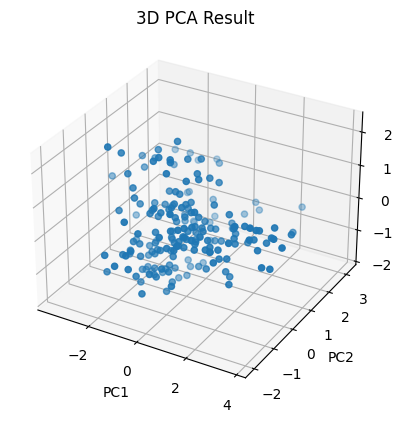

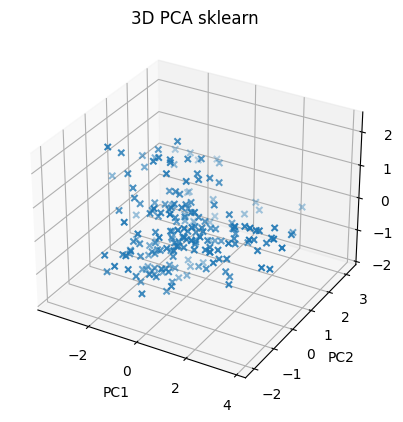

In [21]:
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

pca_sklearn = PCA_sklearn(n_components=3)
X_reduced_sklearn = pca_sklearn.fit_transform(X)

# plot 3d
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points in 3D
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], marker='o')

# Labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Result')

# Show plot
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the data points in 3D
ax.scatter(X_reduced_sklearn[:, 0], X_reduced_sklearn[:, 1], X_reduced_sklearn[:, 2], marker='x')

# Labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA sklearn')

# Show plot
plt.show()

1.0
10


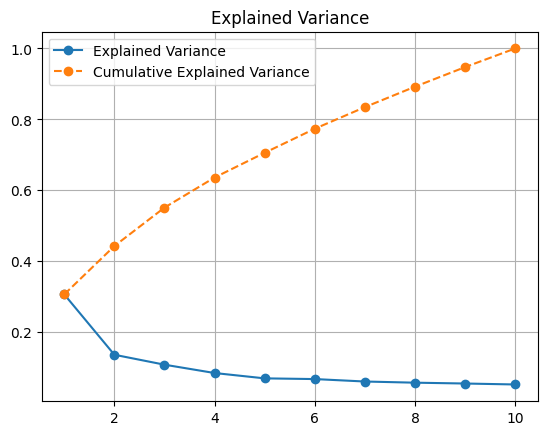

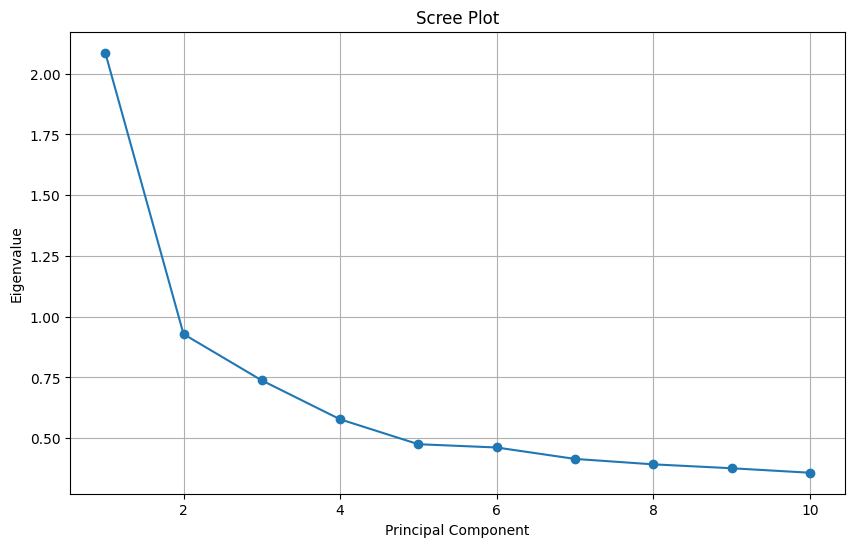

In [22]:
pca = PCA(n_components=10)
pca.fit(X)
# plot the explained variance
explained_variance = pca.explained_variance_ratio()

eigenvalues = pca.eigenvalues_

cumulative_explained_variance = np.cumsum(explained_variance)

print(cumulative_explained_variance[-1])
print(len(explained_variance))

plt.plot(range(1,len(explained_variance)+1),explained_variance,marker='o')
plt.plot(range(1,len(explained_variance)+1),cumulative_explained_variance,linestyle='--',marker='o')
plt.title("Explained Variance")
plt.grid()
plt.legend(['Explained Variance','Cumulative Explained Variance'])
plt.show()

# plot the eigenvalues
plt.figure(figsize=(10,6))
plt.plot(range(1,len(eigenvalues)+1),eigenvalues,marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid()
plt.show()
